# Counts Analysis

Co-occurence of terms analysis: check how often pre-selected cognitive terms appear in abstracts with ERP terms. 

This analysis searches through pubmed for papers that contain specified ERP and selected association terms.

Data extracted is the count of the number of papers with both terms. This is used to infer the associated terms for each ERP.

In [1]:
%matplotlib inline

import numpy as np
from scipy.stats import normaltest

from lisc import Counts
from lisc.utils import SCDB, load_object
from lisc.plts.counts import plot_matrix, plot_clustermap, plot_dendrogram

In [2]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_count_hist, plot_time_associations
from analysis import get_time_associations

## Setup

In [3]:
# Settings
SAVE_FIG = False

In [4]:
# Set the file locations
term_dir = '../terms/'
db = SCDB('../data/')

# Set the name of the file to load
name = 'test'         # 'cognitive', 'disease', 'test'

In [5]:
# Load the counts object
counts = load_object('counts_' + name, directory=db)

## Scrape Information

In [6]:
# Check database information
counts.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build210124-1313.1',
 'count': '32053519',
 'lastupdate': '2021/01/24 18:00'}

In [7]:
# Check requester details
counts.meta_data.requester

{'n_requests': 16,
 'wait_time': 0.1,
 'start_time': '23:49:54 Monday 25 January 2021',
 'end_time': '23:49:59 Monday 25 January 2021',
 'logging': None}

# Global Summaries

The total # of ERP papers is 		 4617


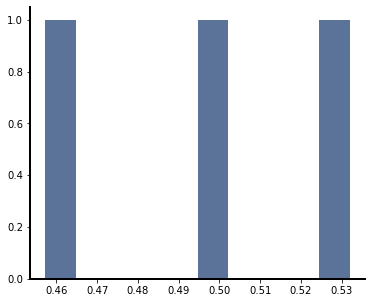

In [8]:
# Check the distribution of ERP papers
print('The total # of ERP papers is \t\t {:.0f}'.format(sum(counts.terms['A'].counts)))
#print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
#    *normaltest(np.log10(counts.terms['A'].counts))))
plot_count_hist(np.log10(counts.terms['A'].counts))

The total # of association papers is 		 592235


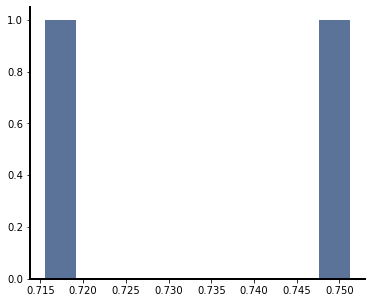

In [9]:
# Check the distribution of ERP papers
print('The total # of association papers is \t\t {:.0f}'.format(sum(counts.terms['B'].counts)))
#print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
#    *normaltest(np.log10(counts.terms['B'].counts))))
plot_count_hist(np.log10(counts.terms['B'].counts))

# Check Counts

In [10]:
# Check the terms with the most papers
counts.check_top(dim='A')
counts.check_top(dim='B')

The most studied term is  'N400'  with  2535  articles.
The most studied term is  'visual'  with  435580  articles.


In [11]:
# Check how many papers were found for each ERP term
counts.check_counts(dim='A')

The number of documents found for each search term is:
  'P600'   -    735
  'N170'   -   1347
  'N400'   -   2535


In [12]:
# Check how many papers were found for each association term
counts.check_counts(dim='B')

The number of documents found for each search term is:
  'language'   -   156655
  'visual'     -   435580


In [13]:
# Check the most commonly associated association term for each ERP
counts.check_data()

For  'P600'  the highest association is  'language'  with         316
For  'N170'  the highest association is  'visual'    with         558
For  'N400'  the highest association is  'language'  with         847


In [14]:
# Check the most commonly associated ERP for each term
counts.check_data(dim='B')

For  'language'  the highest association is  'N400'  with         847
For  'visual'    the highest association is  'N170'  with         558


## Select ERPs with enough articles

In [15]:
# Check how many ERPs currently
counts.terms['A'].n_terms

3

In [16]:
# Drop to only keep ERPs with at least 50 papers
counts.drop_data(50, dim='A')
counts.terms['A'].n_terms

3

## Group Level Plots

In [17]:
# Compute the normalized score (percent association)
counts.compute_score('normalize', dim='A')

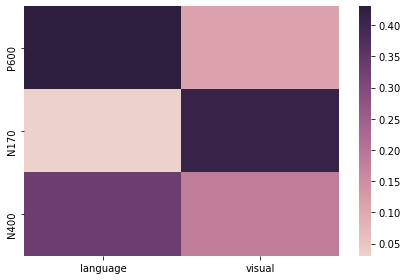

In [18]:
# Plot the matrix of percent associations - ERPs & terms
plot_matrix(counts)

### Similarity across ERPs

In [19]:
# Calculate similarity between all ERPs (based on term association percents)
counts.compute_score('similarity')

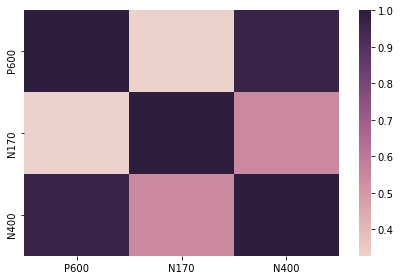

In [20]:
# Plot similarity matrix between ERPs
plot_matrix(counts)

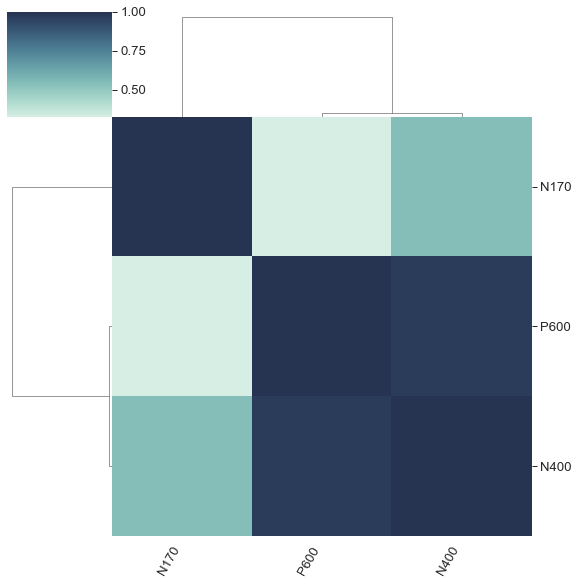

In [21]:
# Plot a clustermap, clustering ERPs and terms based on similarity
plot_clustermap(counts, cmap='blue')

### Similarity across Terms

In [22]:
# Calculate similarity between all terms (based on their associated ERPs)
counts.compute_score('similarity', dim='B')

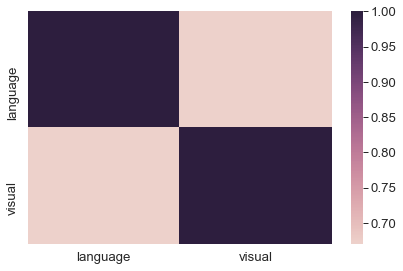

In [23]:
# Plot similarity matrix between terms
plot_matrix(counts)

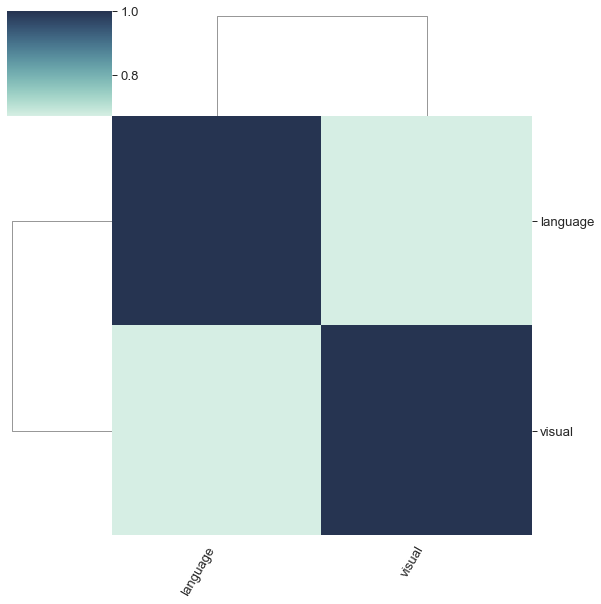

In [25]:
# Clustermap of term similarity
plot_clustermap(counts, cmap='blue')

### Dendrograms

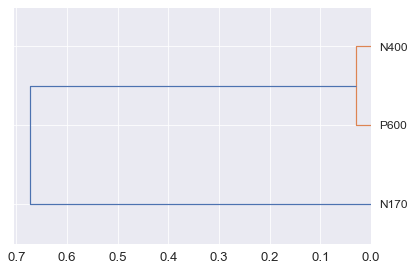

In [26]:
# Plot dendrogram of ERPs, based on percent associations with terms
plot_dendrogram(counts, attribute='counts')

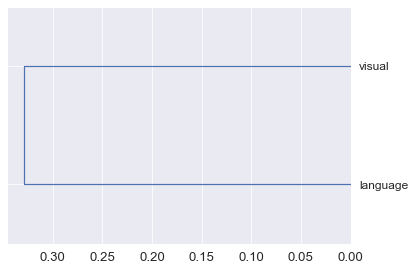

In [27]:
# Plot dendrogram of termss, based on percent associations with ERPs
plot_dendrogram(counts, attribute='counts', transpose=True)

### Function correlates across time

In [34]:
# Re-compute normalized score
counts.compute_score('normalize')

In [35]:
# Drop to most common ERPs, and check how many are left
counts.drop_data(100)
counts.terms['A'].n_terms

3

In [36]:
# Get the time and polarity information for the ERPs
time_associations = get_time_associations(counts)

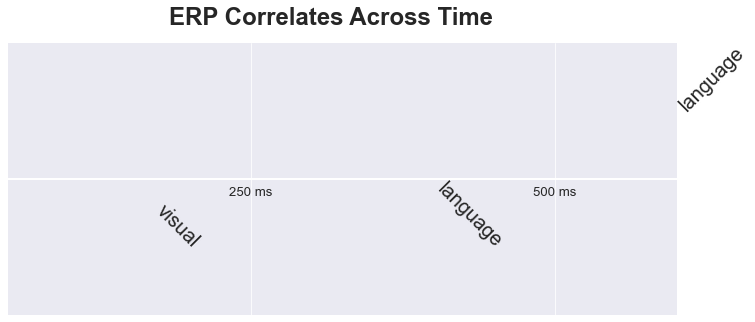

In [37]:
# Plot time associations
plot_time_associations(time_associations)